/tmp/ipython-input-2267816923.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SeniorCitizen'] = features['SeniorCitizen'].astype(int)


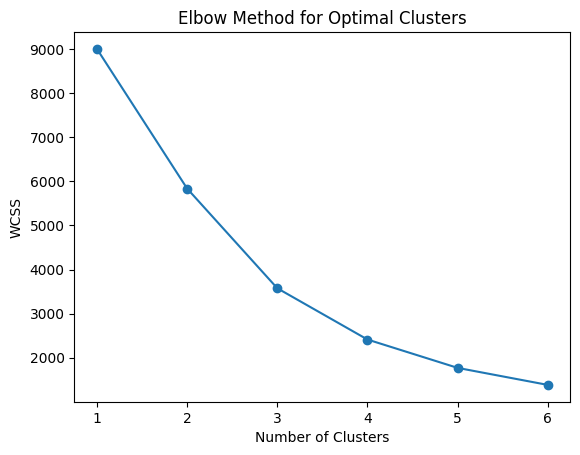

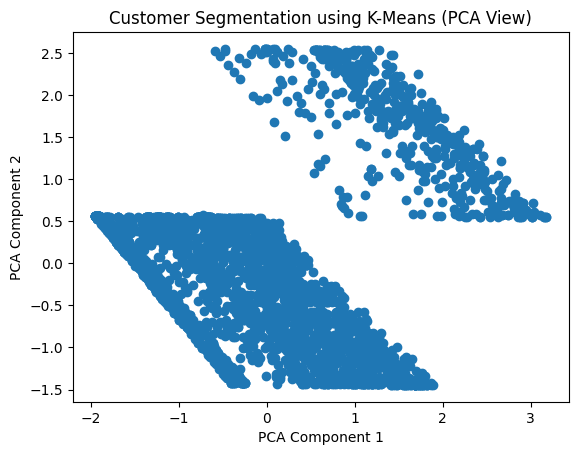

,tenure,MonthlyCharges,SeniorCitizen
Cluster,,,
0,33.717213,80.776639,1.0
1,55.680336,76.852749,0.0
2,14.183461,50.535094,0.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_excel("/content/Dataset_ATS_v2_1152666.xlsx")

# Sampling for faster visualization
df_sample = df.sample(n=3000, random_state=42)

# Feature selection
features = df_sample[['tenure', 'MonthlyCharges', 'SeniorCitizen']]
features['SeniorCitizen'] = features['SeniorCitizen'].astype(int)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 7), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)
df_sample['Cluster'] = kmeans.fit_predict(scaled_features)

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure()
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("Customer Segmentation using K-Means (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Cluster summary
df_sample.groupby('Cluster')[['tenure', 'MonthlyCharges', 'SeniorCitizen']].mean()


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle
import joblib

# Load dataset
df = pd.read_excel("Dataset_ATS_v2_1152666.xlsx")
print("Dataset loaded successfully")
print("Total records:", df.shape[0])

# Select features
X = df[['tenure', 'MonthlyCharges']]
print("\nSelected features for training:")
print(X.head())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeature scaling completed")
print("Scaled data sample:")
print(X_scaled[:5])

# Train KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)
kmeans.fit(X_scaled)
print("\nK-Means model trained successfully")
print("Number of clusters:", kmeans.n_clusters)
print("Random state used:", kmeans.random_state)

# Predict cluster labels
df['Cluster'] = kmeans.predict(X_scaled)
print("\nCluster labels generated (sample):")
print(df[['tenure', 'MonthlyCharges', 'Cluster']].head())

# Save model using pickle
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)
print("\nModel saved successfully using pickle")
print("File name: kmeans_model.pkl")

# Save model using joblib
joblib.dump(kmeans, "kmeans_model_joblib.pkl")
print("Model also saved using joblib")
print("File name: kmeans_model_joblib.pkl")


Dataset loaded successfully
Total records: 7043

Selected features for training:
   tenure  MonthlyCharges
0       1              25
1      41              25
2      52              19
3       1              76
4      67              51

Feature scaling completed
Scaled data sample:
[[-1.27744458 -1.32134962]
 [ 0.35136997 -1.32134962]
 [ 0.79929397 -1.52075464]
 [-1.27744458  0.37359302]
 [ 1.41009942 -0.45726121]]

K-Means model trained successfully
Number of clusters: 3
Random state used: 42

Cluster labels generated (sample):
   tenure  MonthlyCharges  Cluster
0       1              25        0
1      41              25        0
2      52              19        0
3       1              76        1
4      67              51        2

Model saved successfully using pickle
File name: kmeans_model.pkl
Model also saved using joblib
File name: kmeans_model_joblib.pkl


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

# Load dataset
df = pd.read_excel("Dataset_ATS_v2_1152666.xlsx")

# Select required features
X = df[['tenure', 'MonthlyCharges']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate KMeans with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Predict cluster labels for entire dataset
df['Cluster'] = kmeans.predict(X_scaled)

# Save the trained model
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

df.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn,Cluster
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes,1
1,Male,0,No,41,Yes,No,DSL,One year,25,No,2
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No,2
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes,1
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No,2
